# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [85]:
#.tsv são separados por tab "\t", assim como .csv é separado por ","
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [86]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

([<matplotlib.axis.XTick at 0x7ff44a28c7f0>,
 <a list of 5 Text xticklabel objects>)

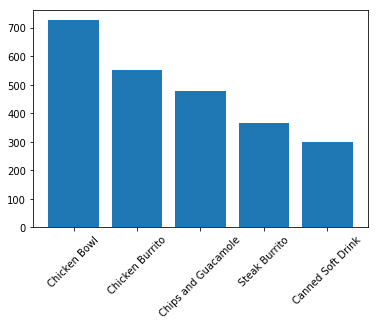

In [87]:
#Os 5 produtos mais comprados
top5 = chipo.item_name.value_counts()[:5]

#Representa o tamanho do vetor que vai estar no eixo horizontal (=5)
x = np.arange(len(top5))

#Representa as quantidades dos 5 mais pedidos
y = top5.values

#Plota o gráfico
plt.bar(x,y)

#Altera label do eixo horizontal de integers para os nomes dos produtos
plt.xticks(x, top5.index, rotation='45')

In [88]:
#Uma forma mais inteligente de fazer

In [89]:
#Retorna um dataframe só com essas colunas
chipo_redux = chipo.filter(['quantity','item_name'])

In [90]:
#agrupar por item e somar as quantidades
#colocar em ordem crescenter
#retornar apenas os 5 primeiros

top5_versao2 = chipo_redux.groupby(by='item_name').sum().sort_values(by='quantity', ascending=False).head(5)
top5_versao2

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


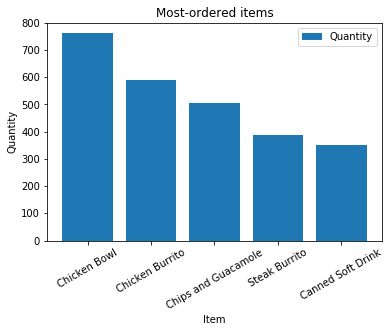

In [91]:
plt.bar(np.arange(len(top5_versao2)), top5_versao2.quantity, label='Quantity')

#Colocar os valores corretos no eixo horizontal
plt.xticks(np.arange(len(top5_versao2)), top5_versao2.index.values, rotation='30')

#Nomear os eixos
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('Most-ordered items')
plt.legend()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [92]:
#Formatar a coluna de preços para o type adequado
chipo['item_price'] = chipo['item_price'].apply(lambda x: str(x).replace('$','')).astype('float64')

#Agrupar o dataframe por item_name, somando quantity e item_price
chipo_redux2 = chipo.groupby(by='item_name').sum()

#Atribuir a item_price o valor unitário dos produtos
chipo_redux2['item_price'] = chipo_redux2['item_price']/chipo_redux2['quantity']

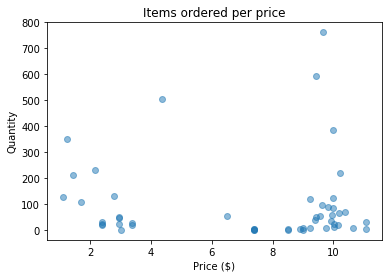

In [93]:
plt.scatter(chipo_redux2['item_price'], chipo_redux2['quantity'], alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('Quantity')
plt.title('Items ordered per price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

### Fazer um gráfico de pizza que mostre quantos pedidos incluíram bebida e quantos não

In [94]:
bebidas = ['Canned Soft Drink','Bottled Water','Canned Soda','6 Pack Soft Drink', 'Izze','Nantucket Nectar']

In [95]:
#Total de pedidos

total = len(chipo.groupby(by='order_id'))
total

1834

In [96]:
#Obter dataframe apenas com pedidos que tenham uma das bebidas listadas
com_bebida = chipo.query('item_name in @bebidas')

#Contar o número de pedidos
numero_com_bebida = len(com_bebida.groupby(by='order_id'))
numero_com_bebida

589

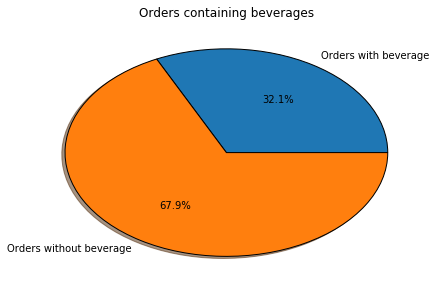

In [97]:
#Gráfico de pizza para mostrar as porcentagens

slices = [numero_com_bebida, total-numero_com_bebida]
labels = ['Orders with beverage', 'Orders without beverage']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'Black'}, shadow=True, autopct='%1.1f%%')
plt.tight_layout()
plt.title('Orders containing beverages')

In [98]:
produtos = chipo.groupby(by='item_name', as_index=False).sum()
bebidas_df = produtos.query('item_name in @bebidas')
bebidas_df

,item_name,order_id,quantity,item_price
0,6 Pack Soft Drink,52322,55,356.95
6,Bottled Water,175944,211,302.56
9,Canned Soda,76396,126,137.34
10,Canned Soft Drink,304753,351,438.75
34,Izze,10587,20,67.80
35,Nantucket Nectar,21814,29,98.31


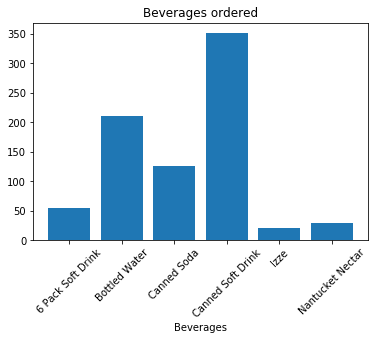

In [99]:
import numpy as np

plt.bar(np.arange(len(bebidas_df)), bebidas_df.quantity, label='Quantity')

plt.xticks(np.arange(len(bebidas_df)), bebidas_df.item_name, rotation='45')
plt.title('Beverages ordered')
plt.xlabel('Beverages')

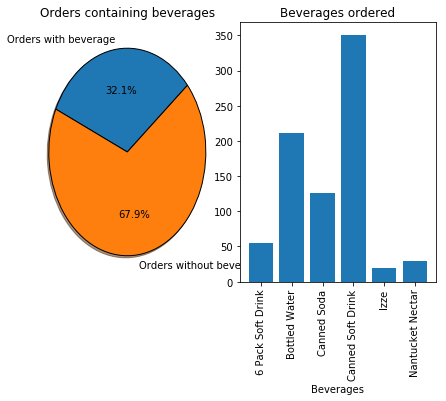

In [100]:
#Printar dois gráficos lado a lado

plt.subplot(1,2,1)
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'Black'}, shadow=True, autopct='%1.1f%%', startangle=40)
plt.tight_layout()
plt.title('Orders containing beverages')

plt.subplot(1,2,2)
plt.bar(np.arange(len(bebidas_df)), bebidas_df.quantity, label='Quantity')

plt.xticks(np.arange(len(bebidas_df)), bebidas_df.item_name, rotation='vertical')
plt.title('Beverages ordered')
plt.xlabel('Beverages')